In [192]:
from torchvision import models
import matplotlib.pyplot as plt

In [193]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [194]:
alexnet = models.AlexNet()

**Update** :Torchvision 0.13 added an upgrade that allows to use pre-trained models on different weigths 

Link: https://github.com/JaidedAI/EasyOCR/issues/766

In [195]:
resnet = models.resnet101(weights='IMAGENET1K_V1')

**Comparing IMAGENET1K_V1 weights with V2**

**Update:** Analyzing transformation applied in the latest weights update 

In [196]:
models.ResNet101_Weights.IMAGENET1K_V2.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [197]:
models.ResNet101_Weights.IMAGENET1K_V1.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

*Because the book example was based on IMAGENET1K_V1 , i'll stick to it. If i were to use the updated version i'd have to update the transform operations*

In [198]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [199]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [200]:
from PIL import Image
img = Image.open("../data/p1ch2/bobby.jpg")

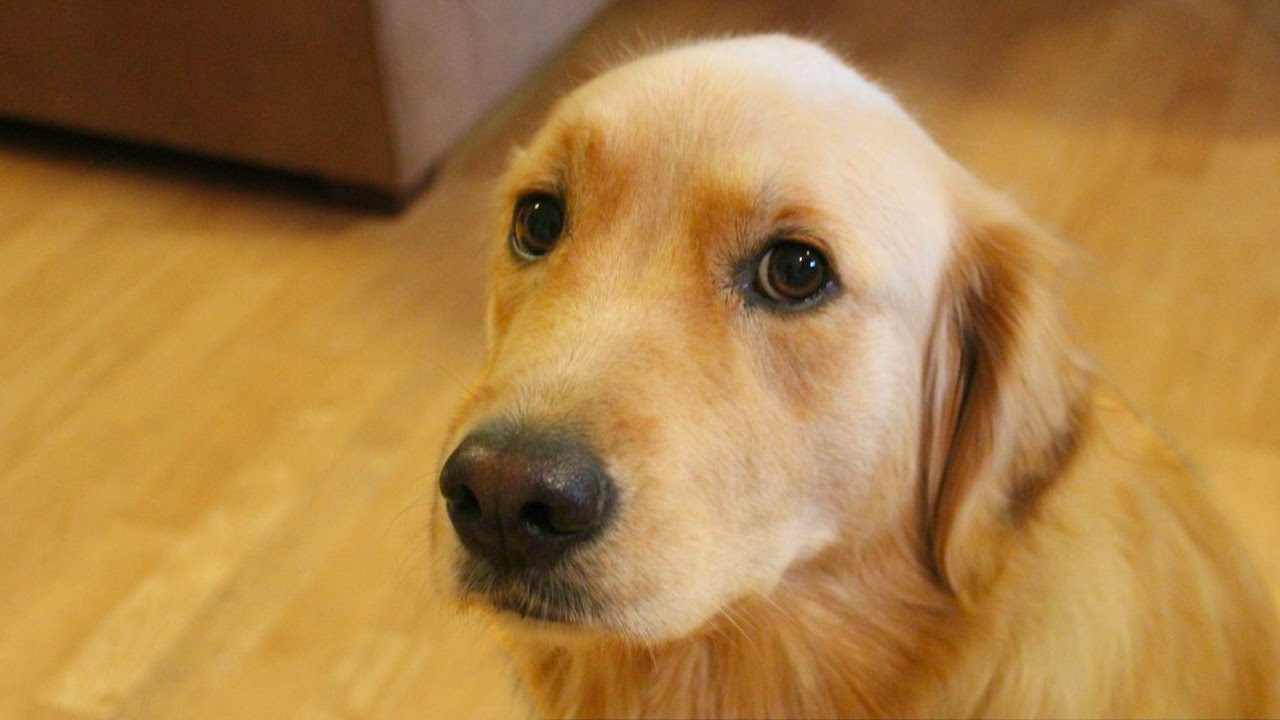

In [201]:
img

In [202]:
img_t = preprocess(img)

**Displaying preprocessed image**

**permute()** rearranges the original tensor according to the desired ordering and returns a new multidimensional rotated tensor.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


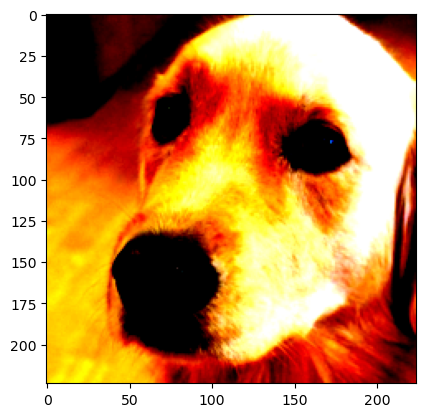

In [203]:
plt.imshow(img_t.permute(1, 2, 0))

**unsqueeze()** Returns a new tensor with a dimension of size one inserted at the specified position

In [204]:
import torch
batch_t = torch.unsqueeze(img_t, 0)


Comparing shape of tensors

In [205]:
img_t.size(), batch_t.size()

(torch.Size([3, 224, 224]), torch.Size([1, 3, 224, 224]))

In [206]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [207]:
out = resnet(batch_t)
out

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5183e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

In [208]:
with open('../data/p1ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [209]:
_, index = torch.max(out, 1)

In [210]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.29334259033203)

In [211]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.29334259033203),
 ('Labrador retriever', 2.80812406539917),
 ('cocker spaniel, English cocker spaniel, cocker', 0.282673180103302),
 ('redbone', 0.2086319923400879),
 ('tennis ball', 0.1162160336971283)]

Testing the pretrained model with Shireen and Lola 

In [212]:
shireen = Image.open("../data/p1ch2/shireen.JPG")

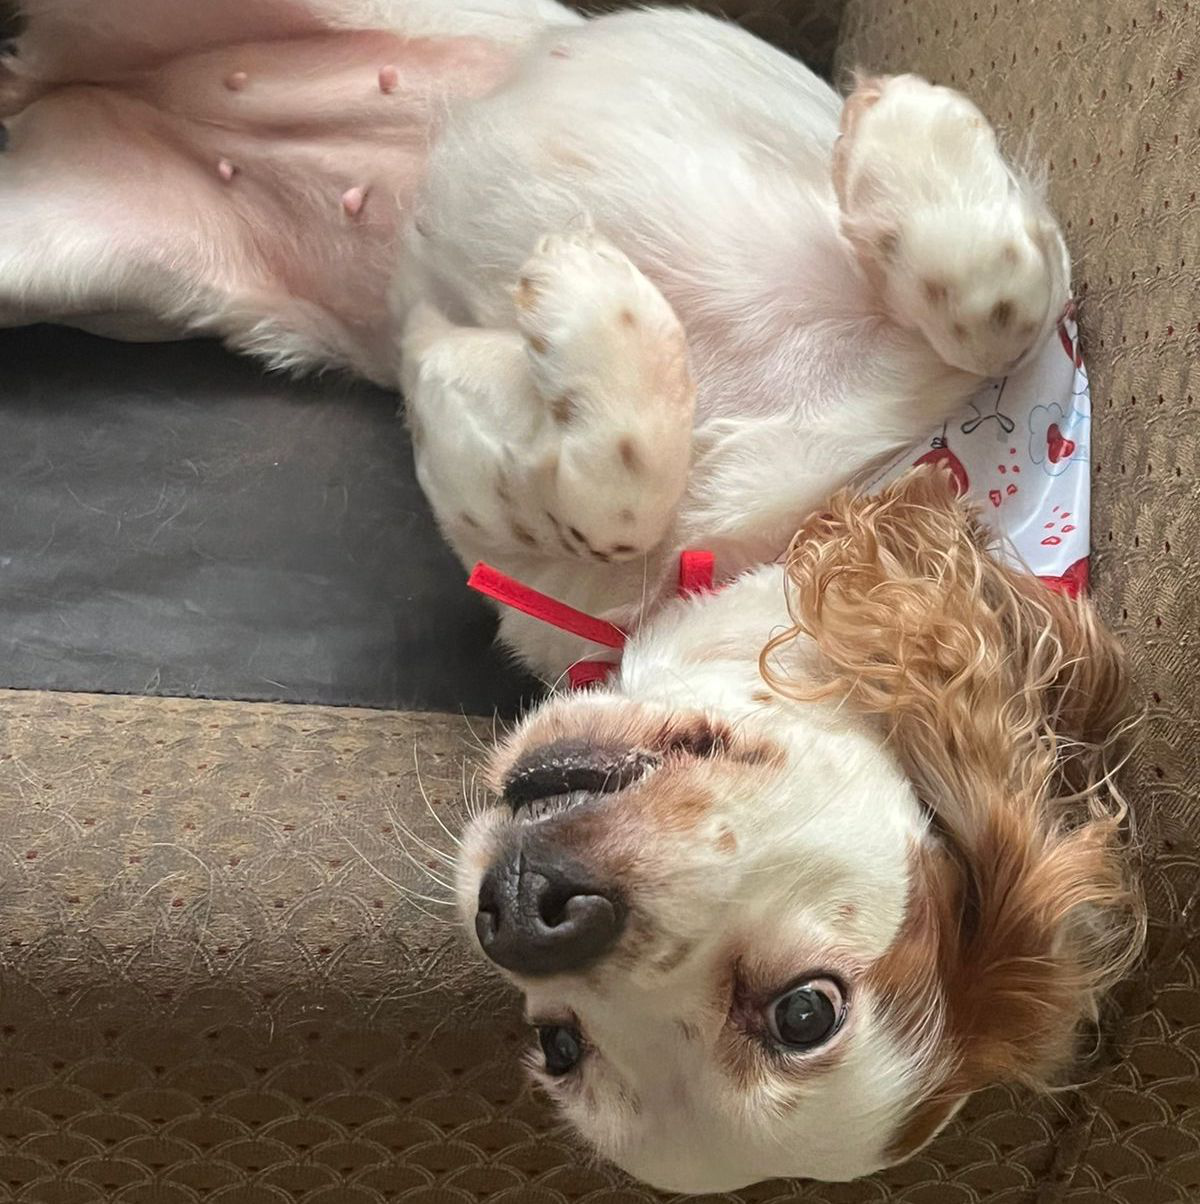

In [213]:
shireen

In [216]:
lola = Image.open("../data/p1ch2/lola.JPG")

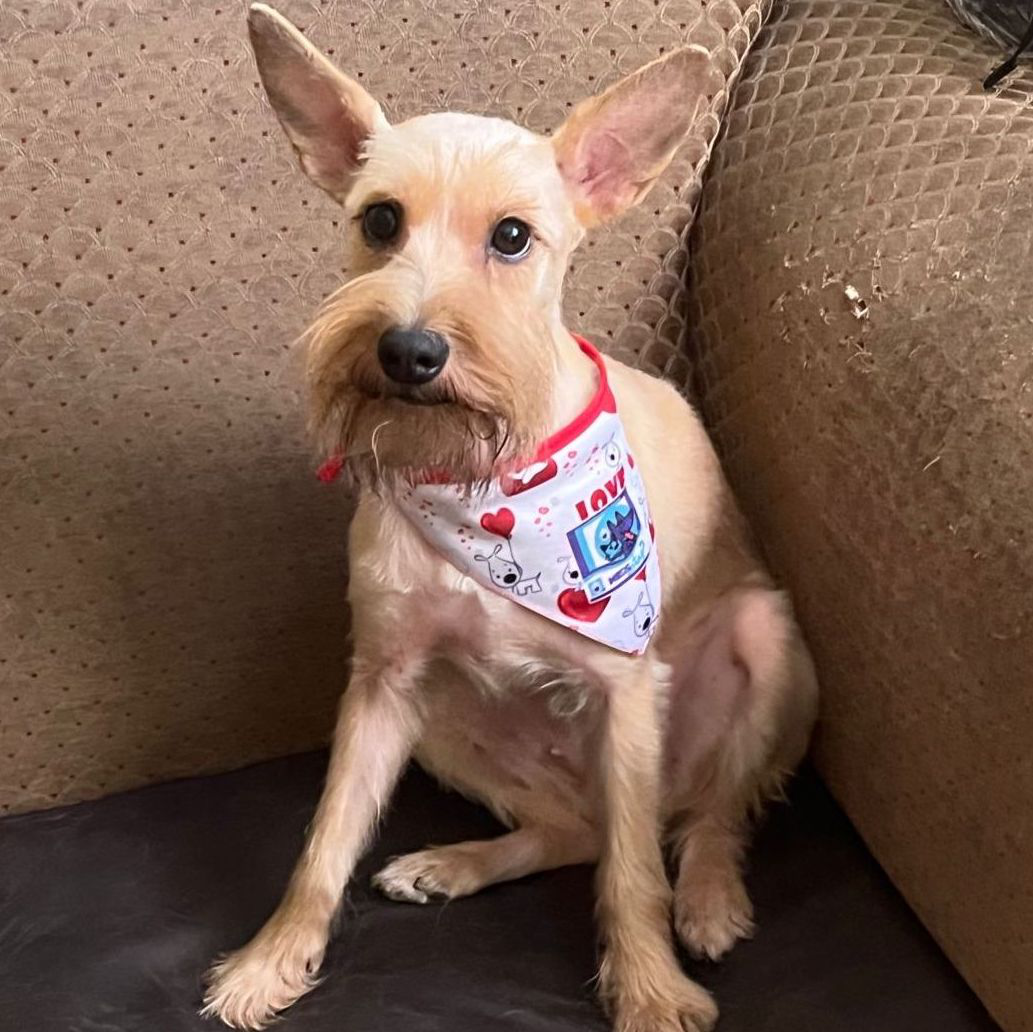

In [217]:
lola

In [218]:
lola_t = preprocess(lola)
shireen_t = preprocess(shireen)

**Predicting top 5 class for Shireen**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


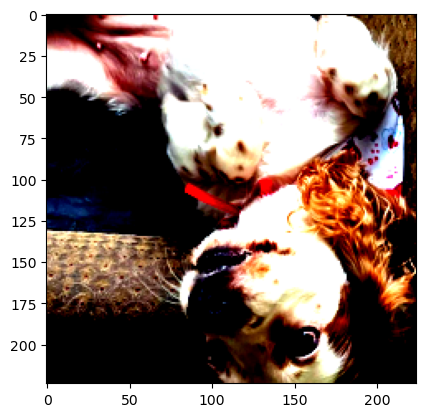

In [220]:
plt.imshow(shireen_t.permute(1, 2, 0))

In [222]:
batch_t = torch.unsqueeze(shireen_t, 0)
out = resnet(batch_t)
out

tensor([[-2.2688e+00,  2.7718e-01, -1.9634e-01,  8.1766e-01,  2.1027e+00,
          1.1417e-01, -8.4119e-01,  1.3318e+00,  3.9261e+00,  3.3065e-01,
         -4.3508e+00, -1.6707e+00, -1.8784e+00, -3.5045e+00, -4.4233e+00,
         -1.9348e+00, -2.5223e+00, -2.8781e-01, -3.0471e+00, -1.7055e+00,
         -2.4451e+00,  1.1547e-02,  4.2834e-01,  2.8542e+00, -6.3390e-01,
         -4.0820e+00, -3.5181e+00, -4.7764e+00, -3.7928e+00,  1.0063e+00,
         -2.0363e+00, -7.9529e-01,  1.8746e+00,  2.0235e+00, -2.9244e-01,
         -1.7561e+00,  1.6605e-03,  4.2301e-01, -1.0899e-01, -2.5436e+00,
         -2.0435e+00, -1.2082e+00, -2.8547e-01, -1.2591e+00, -2.3166e+00,
         -1.0987e+00, -2.4489e+00, -3.0250e+00,  3.2226e-01, -2.9047e+00,
         -1.6244e+00, -6.6872e-01, -5.8435e-01, -2.8760e+00, -2.9464e-02,
         -1.9592e+00, -3.7647e-01, -3.4752e+00, -2.3759e+00, -3.6021e+00,
          8.6197e-01,  2.6599e-01, -7.0071e-01,  1.7225e-02, -3.1759e+00,
         -2.8152e+00, -2.4399e+00, -8.

In [223]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('cocker spaniel, English cocker spaniel, cocker', 0.282673180103302),
 ('English setter', 0.007208365481346846),
 ('Blenheim spaniel', 0.00028872257098555565),
 ('clumber, clumber spaniel', 0.004436419811099768),
 ('Welsh springer spaniel', 0.0030820402316749096)]

**Predicting top 5 class for Lola**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


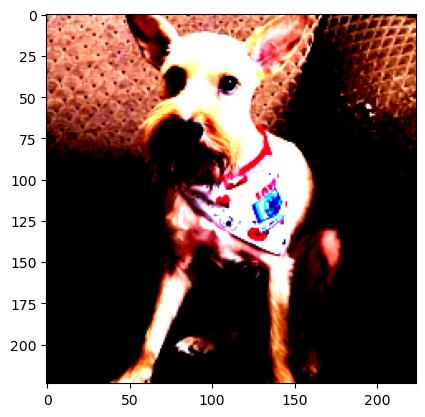

In [224]:
plt.imshow(lola_t.permute(1, 2, 0))

In [226]:
batch_t = torch.unsqueeze(lola_t, 0)
out = resnet(batch_t)
out

tensor([[-3.0029e+00, -1.7855e+00, -3.2772e+00, -1.0533e+00, -1.2365e+00,
         -2.6205e+00, -4.7764e+00,  1.6937e+00,  4.5370e-01, -2.1535e+00,
         -3.2985e+00, -1.7088e+00, -2.6612e+00, -3.0441e+00, -3.9886e+00,
         -1.2989e+00, -5.7370e-01,  6.3495e-01, -1.8420e+00, -1.1698e+00,
         -3.0341e+00, -2.8184e+00, -4.6680e+00, -2.2724e+00, -3.0269e+00,
         -1.1682e+00, -2.3506e+00, -1.5911e+00, -3.0130e+00,  1.1198e-02,
         -1.5553e+00, -1.7247e+00,  2.2776e-02, -8.9833e-01, -2.4878e+00,
         -2.3167e+00, -1.0678e+00, -1.9090e+00, -1.7213e+00, -3.7870e+00,
         -2.2058e+00, -4.5220e-01, -5.7676e-01, -1.9536e+00, -9.2740e-01,
         -9.4853e-01, -2.1169e+00, -6.1102e-01, -3.7324e+00, -3.8964e+00,
         -4.0265e+00, -5.0244e-01, -9.7952e-01, -2.2940e+00,  1.1411e+00,
         -2.3946e+00, -3.1936e+00, -1.8770e+00, -2.9574e+00, -2.3940e+00,
         -6.7902e-01, -2.8115e+00, -1.2871e+00, -1.0111e+00, -3.7013e+00,
         -3.9649e+00, -4.2639e-01, -1.

In [227]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('miniature schnauzer', 0.0001129188240156509),
 ('toy terrier', 0.00014034293417353183),
 ('Yorkshire terrier', 7.665299199288711e-05),
 ('Scotch terrier, Scottish terrier, Scottie', 0.00010096565529238433),
 ('silky terrier, Sydney silky', 0.0001489356509409845)]